In [1]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Convolution2D

Using TensorFlow backend.


In [2]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

test_set = train_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
import cv2
import matplotlib.pyplot as plt

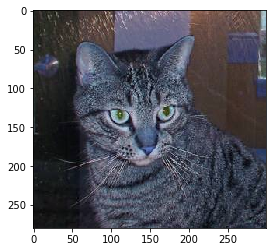

In [10]:
im = cv2.imread('dataset/training_set/cats/cat.1.jpg')
plt.imshow(im)

In [15]:
classifier.fit_generator(
    training_set,
    steps_per_epoch = 8000,
    epochs = 10,
    validation_data = test_set,
    validation_steps = 800
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
  76/8000 [..............................] - ETA: 24:13 - loss: 0.7251 - acc: 0.5448

KeyboardInterrupt: 